# I want to buy a house: Predict households prices

**Context**: We are looking to buy a home in the area of Ames, Iowa. You are addicted to bargains and want to buy for a very good price.

**Target**: Somehow, gain confidence about the prices of the household in order to buy at the best price. 

**Methodology**: Create a regression model to predict the prices of the households.

**Date**: Historic data of households sales in the zone of Ames, Iowa. See `data_description.tx` for more context.

## What do you have to do?
At least, follow the instructions in this notebook and answer the question to create a model that meets the requirement of the project. The questions cover the minimum requirements in order to create a model, but it is advisable to go a bit further to learn more.

### Submittable: how to do it and what to include
The easiest way is to copy this notebook and work directly inside it

Beforehand, there is no "correct" response. What matters is to make decisions and think about these decisions. This reasoning must be based on the data analysis and your knowledge about the problem.

The content you include should:

1. Answer the questions
    * Code is part of answering the questions
    * It is needed to include text to answer the questions (spanish or english)
    * Graphs help explain your arguments
2. Being self-explanatory
    * The code generated by an analysis should be close to the text of this analysis. Write as if you were telling a story
    * Ghe most important it is to explain your reasoning in every step
    * The notebook should be able to be run from top to bottom 
3. Be *concise*. If something doesn't help to answer the questions, please don't include it
    * Sometimes you try to do something that doesn't work. This also helps to answer the question (to know what does NOT work)
    * If you do something that seems very interesting but doesn't help, you can add it in a separate file


It is very normal that as you are making progress your answers to previous question can change.  If you have answered something and then realize you don't like your answer, change it! There is no issue. In reality, this is a cyclic problem, not lineal. 

There are no requirements of libraries / languages, but it is highly advisable to use `Python` and use mainly `Pandas` and `scikit-learn`

#### Why do we do it like this?
This format is really typical in selection processes which companies do, where the target is to show your skills and how you approach real data science problems. We try to replicate this, so you gain confidence in the futre in case you face this.

### Structure
The notebook is made up of sever sections which reflect the typical steps of a model creation. We will introduce these section during differnt weeks. Each section depends on what you have previously done.

Each section comes which questions of the section. The most typical way to answer the question will be:

1. Start with the question. Leaving your initial thoughts
2. Code and text which help develop your answer
3. A final comment stating your final "answer". A summary of the previous comments

Note that sometimes the "question" is more like an instruction. In these cases we expect a final result more than a text answer. Even so, it is important to include and explanation of what you are doing!

The data can be found in `primer-ejercicio/data/house-price-data.csv`.

## Understand the data
The most important of any data science problem is understanding the data. If you don't understand them, you can't create a model that makes sense.

### Load the data
First of all is to load the data, make sure everything is ok and begin to make up ideas about how the data is related to our problem.

In [311]:
# Import all libraries needed during the whole notebook
import pandas as pd
import plotnine as pn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

RANDOM_STATE = 2_055  # Parties in the sky

1. Load the data and print the first 5 rows

In [312]:
house_data = pd.read_csv('./../data/house-price-data.csv', index_col=0)
house_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


2. Has the data been loaded correctly? How do we know it?

- In order to know if the data has been loaded properly it is possible to directly print the variable which contains the datase and then call some of the methods provided by pandas which report the structure, data types and simple statistics. If this information fits what is expected from the dataset, then it has been loaded correctly.

In [313]:
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [314]:
house_data.shape

(1460, 80)

In [315]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 496 to 692
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt   

In [316]:
house_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [317]:
house_data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

*Text explaining our reasoning*

The data has been loaded correctly into the DataFrame for the most part. But there are a few things to consider:
- The DataFrame has the expected number of rows and columns with a couple of exceptions:
    - The column named 'Bedroom' in the documentation is named 'BedroomAbvGr' in the dataset.
    - The column named 'Kitchen' in the documentation is named 'KitchenAbvGr' in the dataset.
- There are some missing/null values in unexpected columns:
    - Feature 'LotFrontage' has 259 missing values where a number is expected. Missing value could possibly mean 0 (smallest number is 21).
    - Feature 'MasVnrType' has 872 missing data. Documentation specifies a 'None' value for the column, however there are 8 'NA' values.
    - Feature 'MasVnrArea' has 8 'NA' values (same rows which have 'NA' on feature 'MasVnrType'). There are also 5 values set (different from 0) when 'MasVnrType' is 'None'.
    - Feature 'Electrical' has a missing value, but documentation does not specify there can be an N/A value.
    - Feature 'BldgType' has values 'Duplx' and 'TwnhsI' in the documentation that appear respectively as 'Duplex' and 'Twnhs' in the dataset. They will be assumed as typos.
- There are some rows with incoherent values:
    - Row with ID '949' has a 'NA' value in feature 'BsmtExposure', however it has values for the rest of the basement feature. The value for that columns should probably be 'No'.
    - Row with ID' 333' has a 'NA' value in feature 'BsmtFinType2', however it has a value in feature 'BsmtFinSF2'. It could simply be assumed to use the value 'GLQ' since the row has that value in the variable 'BsmtFinType1'.
    - Row with ID '524' has an earlier year in 'YrSold' than 'YearRemodAdd'. Might just mean this data was recorded some time after the house was sold. Probably assuming 'YearRemodAdd' value is the same as 'YrSold' should work fine. 

Even if the dataset is not perfect, all these minor issues should not be a problem in order to create a model that can solve the problem given.

3. After a first look. What do you think we have in our data?

After a first look to the data, these are the conclusions which can be taken about our dataset:
- The dataset has the records of houses that have been sold. Each one of the records have plenty of different features about the house, as well as the conditions of the sale itself.
- The dataset is well-structured and documented overall but there are a few exceptions to consider when processing it, as explained above.

### Analyze the data
To understand what we have in the data, we have to analyze it. In reality, this is the most important step of all, and it can take hours, days or months (the truth is that in a company, we never finish analyzing data). The knowledge we gain here is the basis of the reasoning that we will use to make decisions in the future.

Here we search for things such as:

1. The behaviour of our data.
2. The issues we can have.
3. An initial impression of what we can and cannot do with these data.
4. The methodologies that we will probably use.

1. How many rows of data do we have? What represents each row?

In [318]:
row_count = house_data.shape[0]
row_count

1460

- There are a total of 1460 rows in the dataset.
- Each one of the rows represent information about a house that has been sold in Ames, state of Iowa (USA) between the years 2006 and 2010. This information can be classified in two main categories:
    * Attributes of the house at the moment it was sold. Such as size the house, number of rooms, etc...
    * The conditions in which the sale was made: the price, contract type or other possible special conditions (partial sale, family sale, etc...)

2. ¿Hay filas que no son relevantes para nuestro problema?

Most the rows should be relevant for our problem since they represent useful information that fits the problem given. However, there are some rows that don't represent normal house sales, thus potentially making our prediction model more inaccurate when trying to obtain a 'regular' prediction. These features are:
  - SaleCondition: this feature indicates the condition in which the sale was made. Most of the houses were sold in a 'Normal' condition but some of them were sold in an 'Abnormal' way. For the problem given it would be appropriate to only consider houses that were sold under 'Normal' conditions since we want to predict sale prices of regular households. 
  - SaleType: this feature indicates the type of the contract signed between the parties for the house sale. Most of these types are 'WD' which represent a normal contract between individuals, the rest of values are a minority which cover the rest of the multiple cases. According to the given the problem, only contracts with type 'WD' are relevant for our case since we are considered to be particulars looking for a house.

It would be appropriate to remove these rows from the dataset since they don't represent valid data that can help us find a solution to our problem. Therefore, these actions should be made in order to remove the potential misleading data:
  - Remove all the rows with feature 'SaleCondition' different from value 'Normal'
  - Remove all the rows with feature 'SaleType' different from value 'WD'

Focusing the model on houses that have been sold in a normal way between individuals can help us make a better model for the case given in this problem.

3. ¿Qué variables crees que van a ser las más importantes? ¿Cómo se comportan estos datos? ¿Qué variable será nuestro target?

- The most important variables for the model will be:
    - Area variables (UsefulArea): 1stFlrSF, 2ndFlrSF, TotalBsmtSF and GarageArea
    - Neighborhood
    - OverallCond
    - OverallCual
    - YearRemodAdd
- These features just listed influence in great measure the price of the sale which will be our target value to predict.
    - UsefulArea: our problem focuses in private households, and this variable represent the area which regular families use the most. A larger area means a more valuable house.
    - Neighborhood: different neighborhoods have different peculiarities which can influence in a considerable way the price of a house
    - OverallCond: this feature rates how well-preserved a house is, the higher the condition the fewer reforms it will need and thus making it more valuable.
    - OverallQual: this indicates the qualities of the materials the house was built of. A higher quality will make a house more expensive.
    - YearRemodAdd: the year the house was last reformed (or built) can tell when the house went through a mayor improvement process. Modern houses are pricier than older ones.
- Our target variable will be the 'SalePrice' variable. It is the value we want to predict in order to buy the best bargain.

4. ¿Cuándo se construyeron las diferentes casas? Dibuja un gráfico para visualizarlo

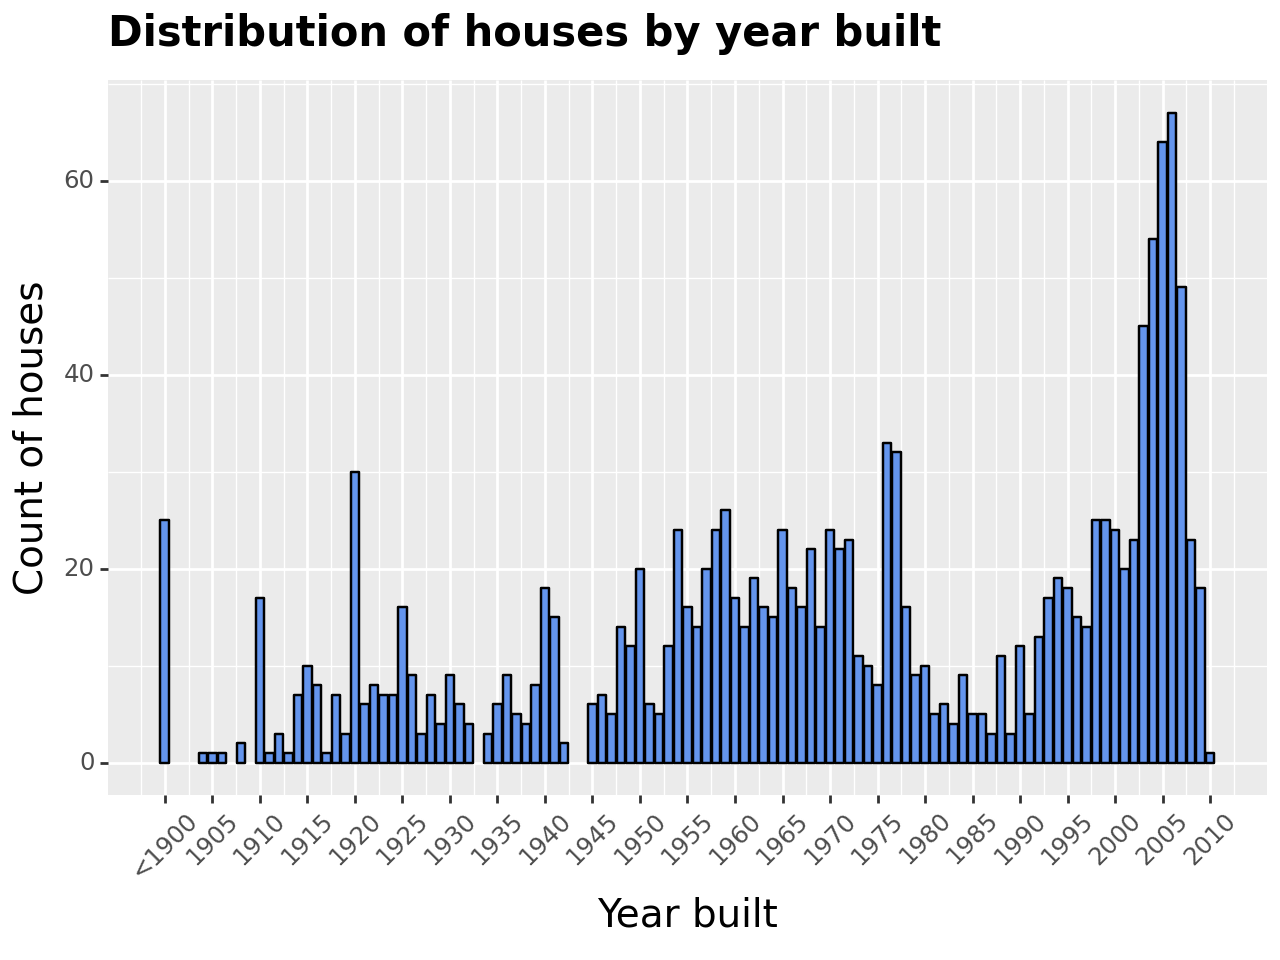

In [319]:
house_data['YearBuiltNormalized'] = house_data['YearBuilt'].where(house_data['YearBuilt'] >= 1900, 1900)

# Clip the year to be at least 1900
house_data.loc[house_data['YearBuiltNormalized'] < 1900, 'YearBuiltNormalized'] = 1900

# Build a dictionary of labels
labels = {year: str(year) for year in range(1900, 2011, 5)}
labels[1900] = '<1900'

plot = (
        pn.ggplot(house_data, pn.aes(**{"x": 'YearBuiltNormalized'})) +
        pn.geom_bar(color="black", fill="#6495ED") +
        pn.theme(
            plot_title=pn.element_text(size=15, face="bold"),
            axis_title_x=pn.element_text(size=14),
            axis_title_y=pn.element_text(size=14),
            axis_text_x=pn.element_text(rotation=45)
        ) +
        pn.labs(title='Distribution of houses by year built', x='Year built', y='Count of houses') +
        pn.scale_x_continuous(breaks=np.arange(1900, 2011, 5), labels=labels)
)
plot.draw()

- Most of the houses were built in the past 20 years. There is also a considerable amount of houses that were built between the 50s and 70s.

5. ¿Cuánto tiempo tardaron las diferentes casas en venderse? Dibuja un gráfico para visualizarlo

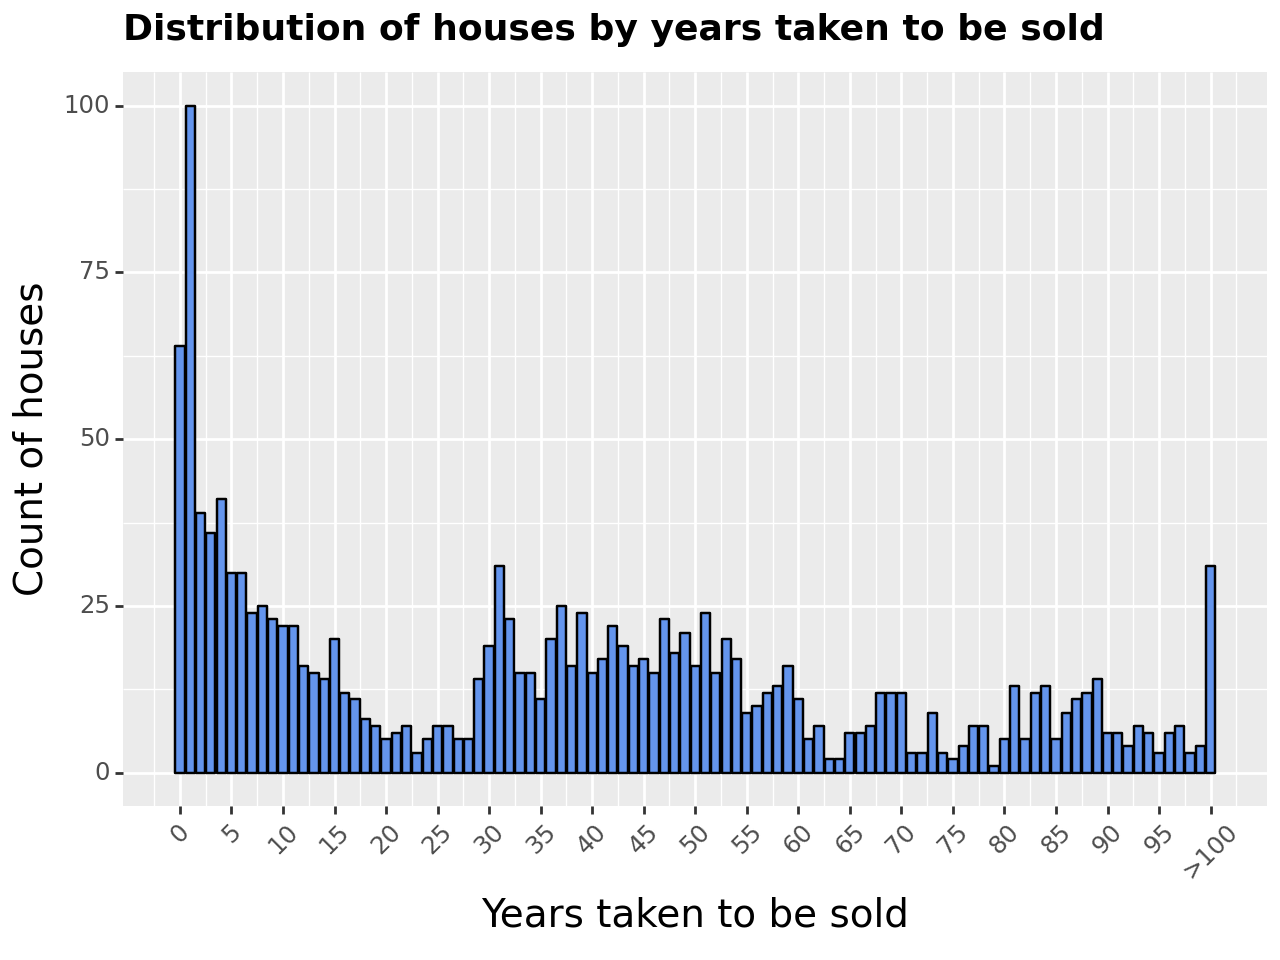

In [320]:
house_data["YearsToSell"] = house_data["YrSold"] - house_data["YearBuilt"]
house_data['YearsToSell'] = house_data['YearsToSell'].where(house_data['YearsToSell'] < 100, 100)

# build a dictionary of labels
labels = {year: str(year) for year in range(0, 101, 5)}
labels[100] = '>100'

plot = (
        pn.ggplot(house_data, pn.aes(**{"x": 'YearsToSell'})) +
        pn.geom_bar(color="black", fill="#6495ED") +
        pn.theme(
            plot_title=pn.element_text(size=13, face="bold"),
            axis_title_x=pn.element_text(size=14),
            axis_title_y=pn.element_text(size=14),
            axis_text_x=pn.element_text(rotation=45)
        ) +
        pn.labs(title='Distribution of houses by years taken to be sold', x='Years taken to be sold',
                y='Count of houses') +
        pn.scale_x_continuous(breaks=np.arange(0, 101, 5), labels=labels)

)
plot.draw()

- Most of the houses were sold in the first few years following their construction. Then there is a considerable group of houses which were sold between 30-55 years after being built.

### Limpiar los datos
Cuando creamos un modelo, no hay forma de "mágicamente" contar al modelo que es lo que queremos. Tenemos que usar unos datos que representan bien nuestro problema y crear un modelo que predice algo que alinea con la respuesta que buscamos.

Si los datos son "sucios" (malos, con problemas, reflejan algo que no representa bien a nuestro problema) - nuestro modelo va a predecir cosas que no acaban de tener mucho sentido, no son de fiar o directamente son equivocadas.

Cosas que queremos evitar

* Datos que no tienen que ver con nuestro problema
* Datos que tienen poca muestra
* Outliers
* Nulos

1. Identifique los principales problemas que tienen las variables que parecen (por ahora) más interesantes para el modelo

The variables which seem the most relevant for the model have the following issues:
    - UsefulArea: has a pretty big standard deviation.
    - Neighborhood: uneven sample quantity between neighborhoods. Categorical data, must be transformed into numerical values.
    - OverallCond: data distribution is rather low, values 5, 6 and 7 represent most of the houses. Might be correlated with variable 'OverallQual'.
    - OverallQual: some values have little to no representation. Might be correlated with variable 'OverallCond'.
    - YearRemodAdd: Has a pretty big outlier on its lowest value '1950'.

2. Arregla los problemas

In [321]:
house_data_group_price = house_data.groupby("Neighborhood")["SalePrice"].mean().reset_index()
house_data_group_price_sorted = house_data_group_price.sort_values(by="SalePrice")
neighborhoods_sorted = house_data_group_price_sorted["Neighborhood"].tolist()
neighborhoods_sorted

['MeadowV',
 'IDOTRR',
 'BrDale',
 'BrkSide',
 'Edwards',
 'OldTown',
 'Sawyer',
 'Blueste',
 'SWISU',
 'NPkVill',
 'NAmes',
 'Mitchel',
 'SawyerW',
 'NWAmes',
 'Gilbert',
 'Blmngtn',
 'CollgCr',
 'Crawfor',
 'ClearCr',
 'Somerst',
 'Veenker',
 'Timber',
 'StoneBr',
 'NridgHt',
 'NoRidge']

In [322]:
neighborhood = house_data[['Neighborhood']]
encoder = OrdinalEncoder(categories=[neighborhoods_sorted])
encoded_neighborhood = encoder.fit_transform(neighborhood)
house_data['Neighborhood'] = encoded_neighborhood

In [323]:
# Clipping the sale price to handle outliers 
lower_percentile = house_data['SalePrice'].quantile(0.05)
upper_percentile = house_data['SalePrice'].quantile(0.95)
house_data['SalePrice'] = house_data['SalePrice'].clip(lower_percentile, upper_percentile)

3. Borra todos los datos que no son relevantes para el problema - simplifica los datos

Deleting rows from the dataset that do not represent regular a household sale (as explained above).

In [324]:
house_data.drop(house_data[house_data["SaleCondition"] != "Normal"].index, inplace=True)
house_data.drop(house_data[house_data["SaleType"] != "WD"].index, inplace=True)

## Preparación de los datos para el modelo
Ahora que entendemos bien los datos, tomamos un paso más directo hacia la creación de nuestro modelo preparando los datos para el entrenamiento.

### Relevancia de variables
Por norma general, queremos incluir variables que son importantes en la predicción de nuestro target:

* Tener menos variables más relevantes suele ser mejor - porque simplifica el modelo
* Si no tenemos variables relevantes, los resultados del modelo van a ser malos

Para analizar la relevancia, normalmente miramos que haya "correlaciones" entre diferentes variables y el target. Hay muchas formas de analizar estas "correlaciones", como por ejemplo:

* Coeficiente de correlación (variables continuas)
* La media del target para cada valor del variable (variables NO continuas)

1. Qué variables son los más relevantes? Analiza la relevancia para comprobarlo

The variables which are the most relevant for our problem are the following:
 - Area variables: 1stFlrSF, 2ndFlrSF, TotalBsmtSF and GarageArea
 - Neighborhood
 - OverallCond
 - OverallQual
 - YearRemodAdd

In [325]:
overall_cond_relevance = house_data[["OverallCond", 'SalePrice']].corr()
print(
    f"The relevance between the variable 'OverallCond' and 'SalePrice' is {overall_cond_relevance['OverallCond']['SalePrice']:.2f}."
)

overall_qual_relevance = house_data[["OverallQual", 'SalePrice']].corr()
print(
    f"The relevance between the variable 'OverallQual' and 'SalePrice' is {overall_qual_relevance['OverallQual']['SalePrice']:.2f}."
)

year_remod_relevance = house_data[["YearRemodAdd", 'SalePrice']].corr()
print(
    f"The relevance between the variable 'YearRemodAdd' and 'SalePrice' is {year_remod_relevance['YearRemodAdd']['SalePrice']:.2f}."
)


The relevance between the variable 'OverallCond' and 'SalePrice' is -0.07.
The relevance between the variable 'OverallQual' and 'SalePrice' is 0.80.
The relevance between the variable 'YearRemodAdd' and 'SalePrice' is 0.51.


2. Podemos crear algunas variables para mejorar la relevancia?

Yes, the sum of the variables 'GarageArea' + 'TotalBsmtSF' + '1stFlrSF' + '2ndFlrSF' can result in a new feature (UsefulArea) that has a high relevance for our problem.

The relevance between the variable 'UsefulArea' and 'SalePrice' is 0.86.


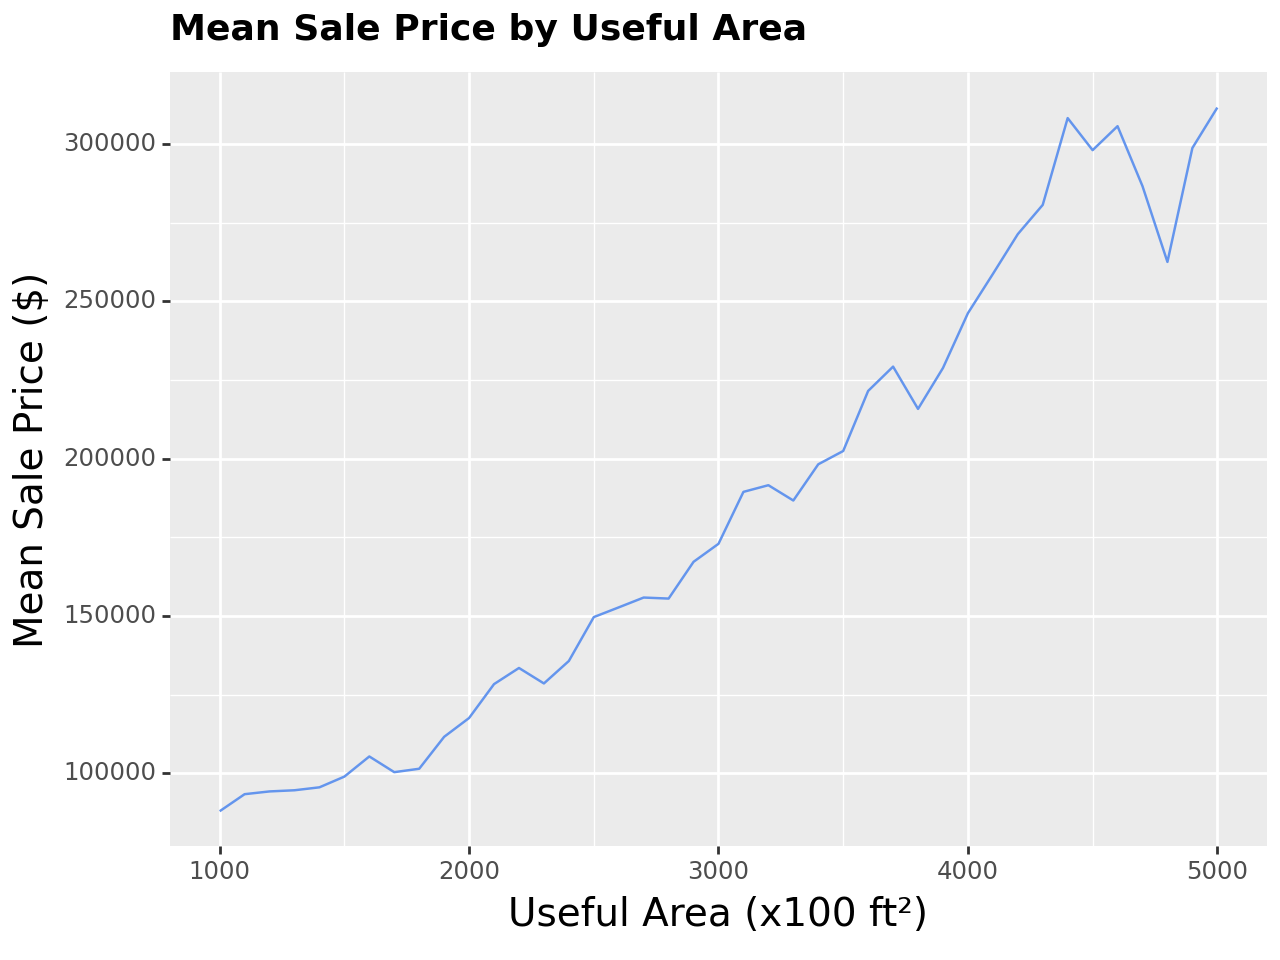

In [326]:
house_data["UsefulArea"] = house_data["TotalBsmtSF"] + house_data["1stFlrSF"] + house_data["2ndFlrSF"] + house_data[
    "GarageArea"]
house_data["UsefulArea"] = house_data["UsefulArea"].clip(1_000, 5_000)  # Remove outliers
house_data["UsefulArea"] = house_data["UsefulArea"] // 100 * 100  # Group area by hundreds for better readability

useful_area_relevance = house_data[["UsefulArea", 'SalePrice']].corr()
print(
    f"The relevance between the variable 'UsefulArea' and 'SalePrice' is {useful_area_relevance['UsefulArea']['SalePrice']:.2f}."
)

# Aggregate data
agg_data = house_data.groupby('UsefulArea')['SalePrice'].mean().reset_index()

# Create a line plot
plot = (
        pn.ggplot(agg_data, pn.aes(**{"x": 'UsefulArea', "y": 'SalePrice'})) +
        pn.geom_line(color="#6495ED") +
        pn.theme(
            plot_title=pn.element_text(size=13, face="bold"),
            axis_title_x=pn.element_text(size=14),
            axis_title_y=pn.element_text(size=14),
        ) +
        pn.labs(
            title='Mean Sale Price by Useful Area',
            x='Useful Area (x100 ft²)',
            y='Mean Sale Price ($)'
        )
)
plot.draw()

### Train y test
Dividir los datos en train y test (o train, test y validación) es un paso fundamental para la correcta evaluación de nuestro modelo. Buscamos replicar el efecto de "tener datos nuevos". 

Nota: En realidad, lo más correcto seria dividir en train / test ANTES de analizar relevancias - pero simplificamos un poco por ahora.

Nota 2: Si dividimos de forma *random* es importante fijar el seed (te vas a volver loco si no)

1. Qué variables quieres elegir para tu `X` final?

The features chosen for the final `X` are: UsefulArea, Neighborhood, OverallCond, OverallQual, YearRemodAdd


In [327]:
features_chosen = [
    "UsefulArea",
    "Neighborhood",
    "OverallCond",
    "OverallQual",
    "YearRemodAdd",
]
target = "SalePrice"

X = house_data[features_chosen]
y = house_data[target]

2. Divide los datos en train / test

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## Modelado
Ahora vamos a entrenar el modelo. Si has hecho lo anterior bien, este paso es muy sencillo. Normalmente incluimos aquí optimizaciones del modelo, pero para el primer ejercicio esto es de menor importancia.

### Entrenar el modelo
La parta más sexy, pero por ahora lo más sencillo. Tiramos de librerías de modelos ya hechos para simplificarnos la vida.  

1. Crea un modelo de regresión

In [329]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

2. Generar predicciones para tu conjunto de test

In [330]:
y_predict = model.predict(X_test)

### Evaluar el modelo
No vamos a dedicar mucho esfuerzo en este paso por ahora, pero es fundamental evaluar las predicciones que hemos generado. El objetivo es entender lo bueno que es nuestro modelo, para entender si podemos fiar de los resultados y usarlo para responder a nuestro problema.

1. Elige las métricas para tu evaluación

The metrics chosen to evaluate the model are: 
* Mean absolute error
* Median absolute error
* Root mean squared error

2. Evalúa las predicciones generadas

In [331]:
baseline = np.empty(len(y_test))
baseline.fill(y_test.mean())
baseline_mean_absolute_error = metrics.mean_absolute_error(y_test, baseline)
baseline_median_absolute_error = metrics.median_absolute_error(y_test, baseline)
baseline_root_mean_squared_error = metrics.mean_squared_error(y_test, baseline, squared=False)

print("Model baseline")
print(f"Mean absolute error: {baseline_mean_absolute_error:,.2f}$")
print(f"Median absolute error: {baseline_median_absolute_error:,.2f}$")
print(f"Root Mean squared error: {baseline_root_mean_squared_error:,.2f}$")

metric_mean_absolute_error = metrics.mean_absolute_error(y_test, y_predict)
metric_median_absolute_error = metrics.median_absolute_error(y_test, y_predict)
metric_root_mean_squared_error = metrics.mean_squared_error(y_test, y_predict, squared=False)

print()
print("Model metrics")
print(f"Mean absolute error: {metric_mean_absolute_error:,.2f}$")
print(f"Median absolute error: {metric_median_absolute_error:,.2f}$")
print(f"Root Mean squared error: {metric_root_mean_squared_error:,.2f}$")

Model baseline
Mean absolute error: 46,467.00$
Median absolute error: 41,750.00$
Root Mean squared error: 58,286.41$

Model metrics
Mean absolute error: 16,048.84$
Median absolute error: 12,492.69$
Root Mean squared error: 21,064.70$


3. El modelo funciona? Se podría utilizar para ayudarnos con el problema que tenemos?

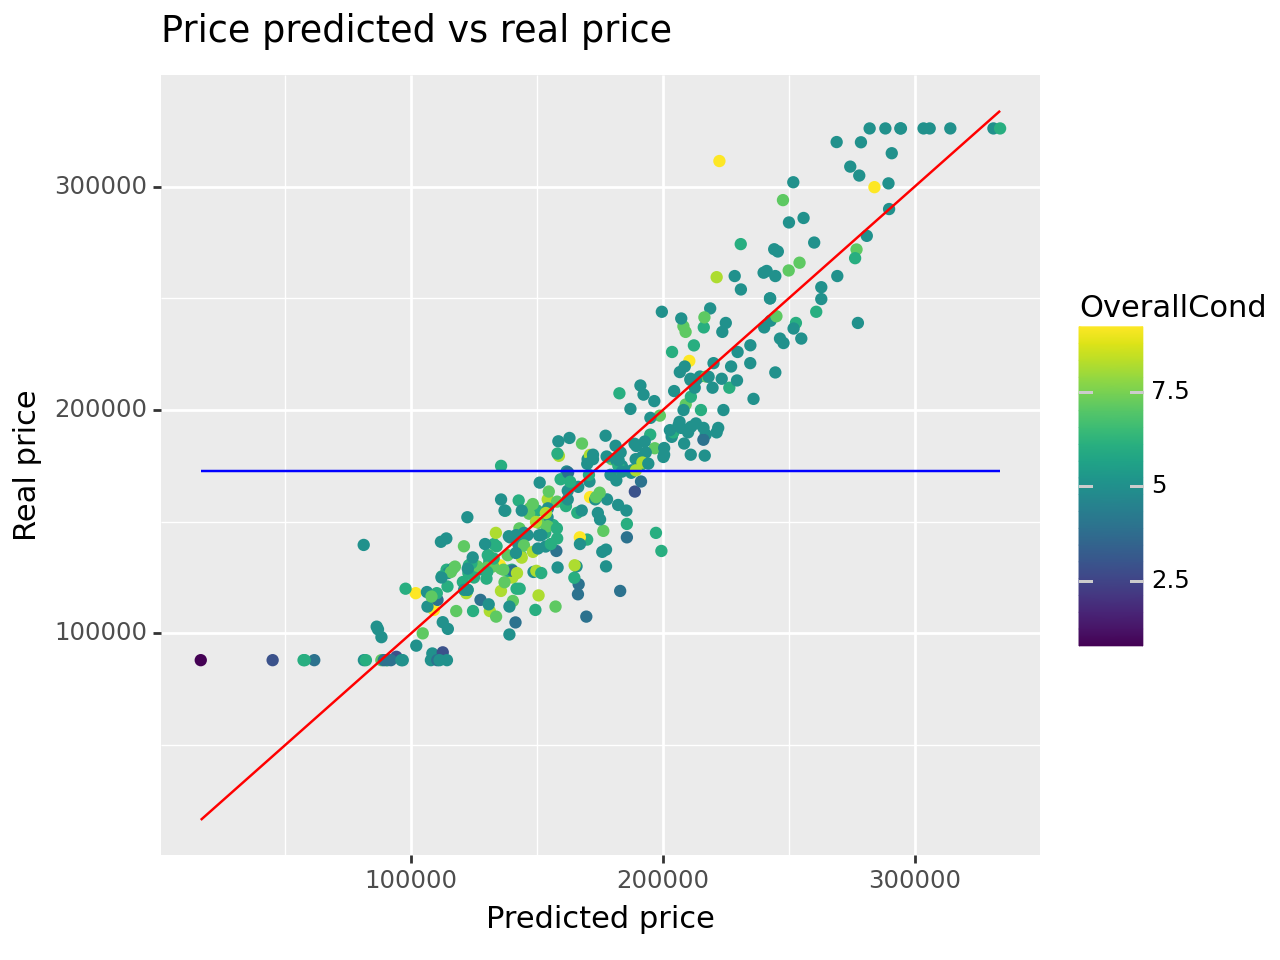

In [332]:
# Creamos el gráfico de dispersión
metrics_df = pd.DataFrame(data={
    "target": y_test,
    "prediction": y_predict,
    "OverallCond": X_test['OverallCond'],
    "baseline": baseline
})
graph = (
        pn.ggplot(
            metrics_df,
            pn.aes(**{"x": "prediction", "y": "target", "color": 'OverallCond'}),
        ) +
        pn.geom_point() +
        pn.geom_line(pn.aes(**{"y": 'prediction'}), color='red') +
        pn.geom_line(pn.aes(**{"y": 'baseline'}), color='blue') +
        pn.labs(
            title='Price predicted vs real price',
            x='Predicted price',
            y='Real price'
        )
)

# Mostramos el gráfico
graph.draw()